In [1]:
import pandas as pd
from matplotlib import pyplot as plt

***Loading CSV into DataFrame***

In [2]:
eutempdf = pd.read_csv('EuCitiesTemperatures.csv')

### Preprocessing/Analysis

***1. Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.***

In [3]:
eutempdf['latitude'] = eutempdf.groupby('country')['latitude'].apply(lambda x:round(x.fillna(x.mean()), 2))
eutempdf['longitude'] = eutempdf.groupby('country')['longitude'].apply(lambda x:round(x.fillna(x.mean()), 2))

***2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)***

In [5]:
# subset of the main dataframe
lat_long_thresholddf = eutempdf[(eutempdf['latitude'] >= 40) & (eutempdf['longitude'] <= 60)]

In [7]:
# countries with max number of cities in geographical band
lat_long_counts = lat_long_thresholddf['country'].value_counts()
max_lat_long_counts = lat_long_counts[lat_long_counts == lat_long_counts.max()]

***3. Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).***

In [8]:
eutempdf['temperature'] = eutempdf.groupby(['EU', 'coastline'])['temperature'].apply(
    lambda x:round(x.fillna(x.mean()), 2))

### Visualization

***Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above***

In [9]:
cities_in_region = eutempdf.groupby('EU')['coastline'].value_counts()

In [10]:
yes_no = cities_in_region['yes']['no']
yes_yes = cities_in_region['yes']['yes']
no_yes = cities_in_region['no']['yes']
no_no = cities_in_region['no']['no']
regions = ['yes/no', 'yes/yes', 'no/yes', 'no/no']
num_cities = [yes_no, yes_yes, no_yes, no_no]

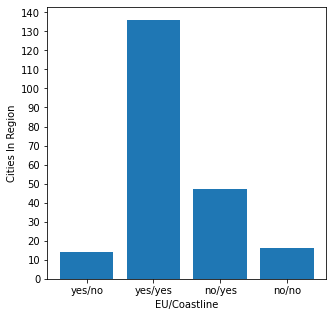

In [11]:
plt.figure(figsize=(5,5))
plt.bar(regions, num_cities)
plt.yticks(range(0, 141, 10))
plt.xlabel('EU/Coastline')
plt.ylabel('Cities In Region')
plt.show()

***Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.***

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

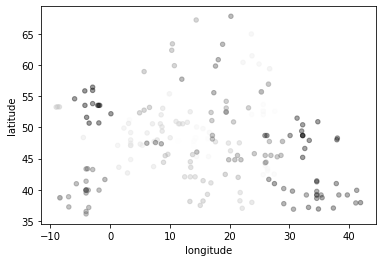

In [34]:
eutempdf.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             c=range(0,213))

***The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups)***